In [3]:
# Import necessary libraries
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Display the first few rows of the training dataset
print("Training Data:")
print(train_data.head())

# Display the first few rows of the test dataset
print("\nTest Data:")
print(test_data.head())

# Display the first few rows of the gender submission dataset
print("\nGender Submission Data:")
print(gender_submission.head())


Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [4]:
# Check for missing values in the training dataset
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Check for missing values in the test dataset
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# Check for duplicates in the training data
print("\nDuplicate Entries in Training Data:", train_data.duplicated().sum())

# Check basic statistics
print("\nSummary Statistics for Training Data:")
print(train_data.describe())


Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicate Entries in Training Data: 0

Summary Statistics for Training Data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   2

In [5]:
# Fill missing 'Age' values with the median age in both datasets
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Drop the 'Cabin' column from both datasets
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

# Fill missing 'Embarked' values with the most frequent value in the training dataset
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Fill the single missing 'Fare' value in the test dataset with the median fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Verify that all missing values have been handled
print("Missing Values in Training Data after Cleaning:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data after Cleaning:")
print(test_data.isnull().sum())


Missing Values in Training Data after Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing Values in Test Data after Cleaning:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


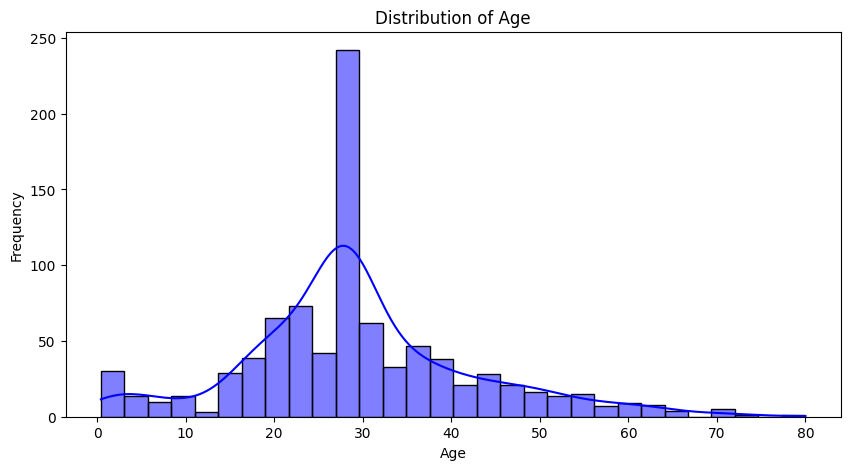

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


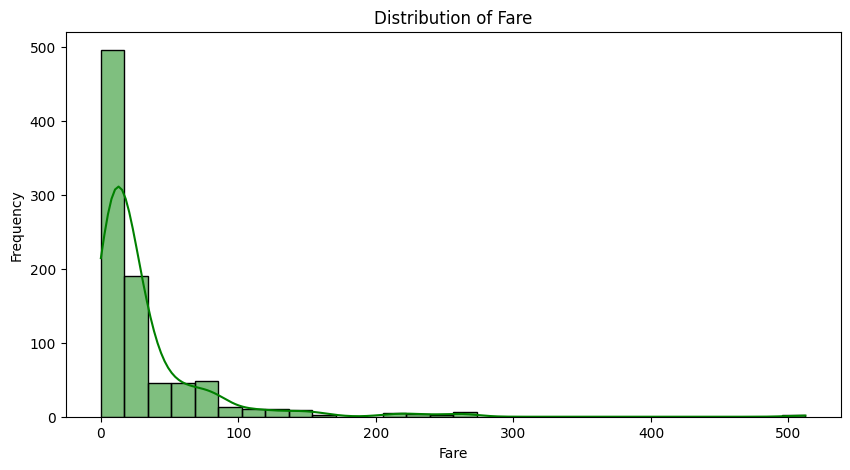

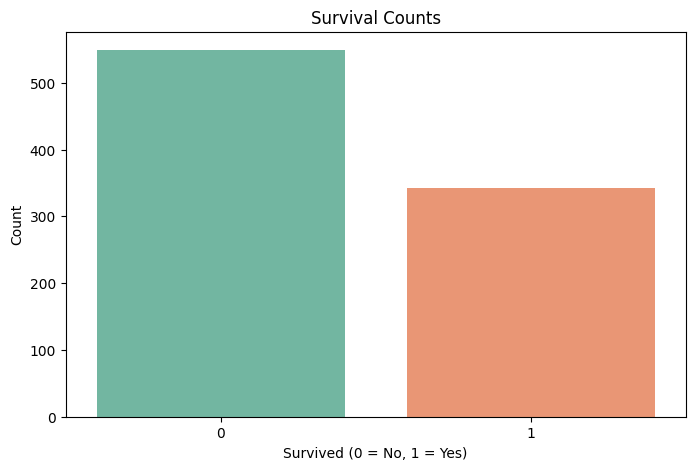

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Fare
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Fare'], kde=True, bins=30, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Survival Counts
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Survived', palette='Set2')
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


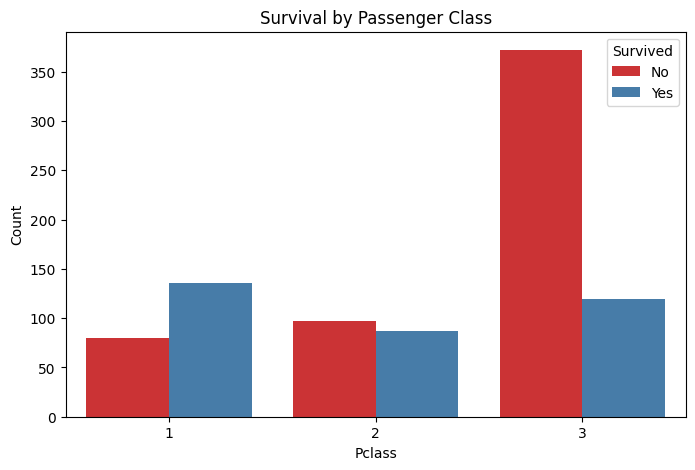

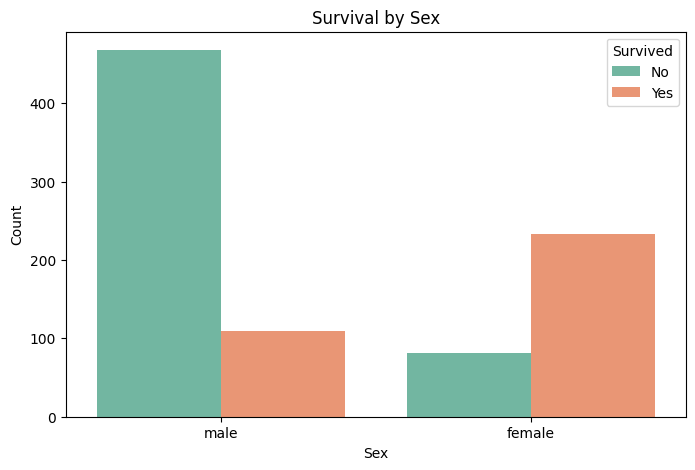

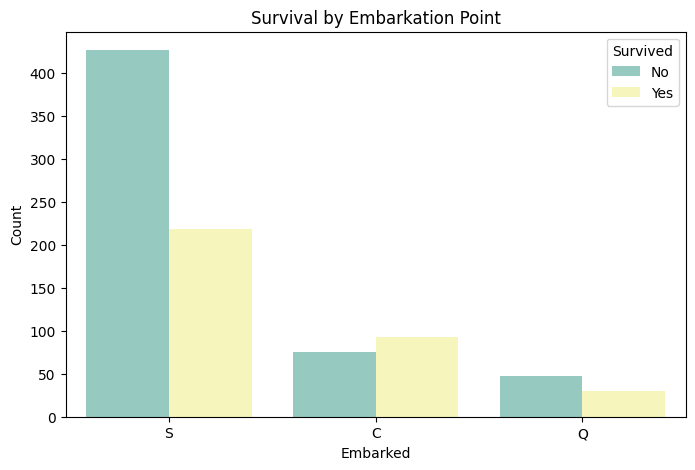

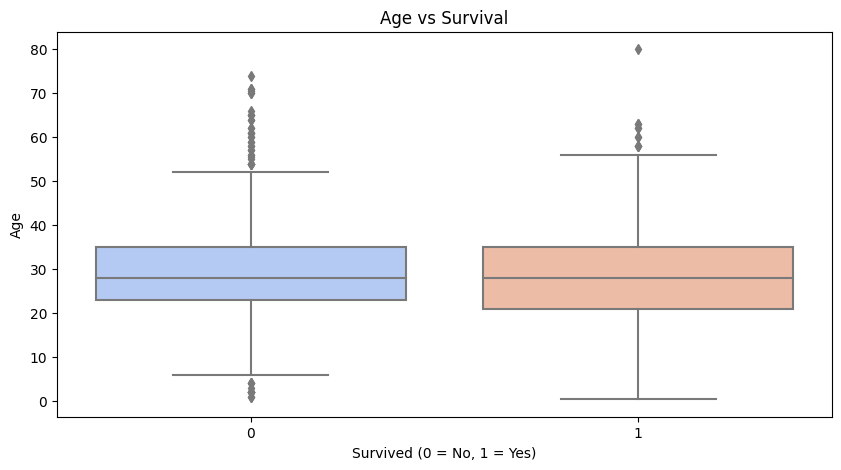

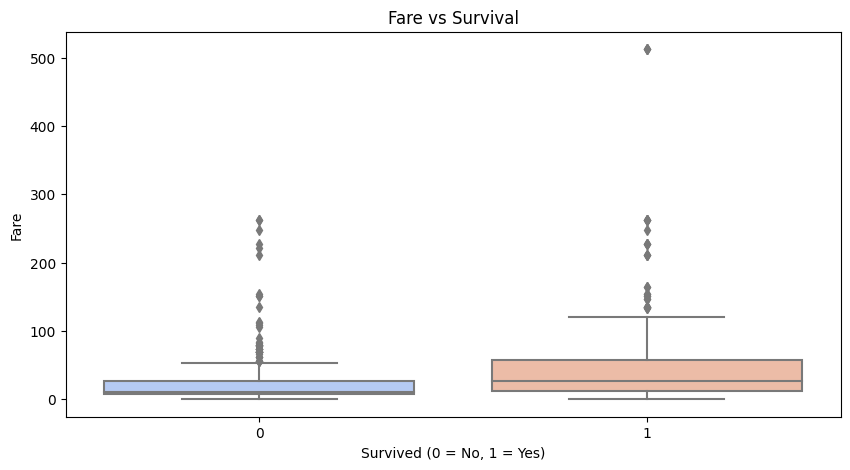

In [8]:
# Survival by Pclass
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival by Embarked
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette='Set3')
plt.title('Survival by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Boxplot: Age vs Survival
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, x='Survived', y='Age', palette='coolwarm')
plt.title('Age vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Boxplot: Fare vs Survival
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, x='Survived', y='Fare', palette='coolwarm')
plt.title('Fare vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


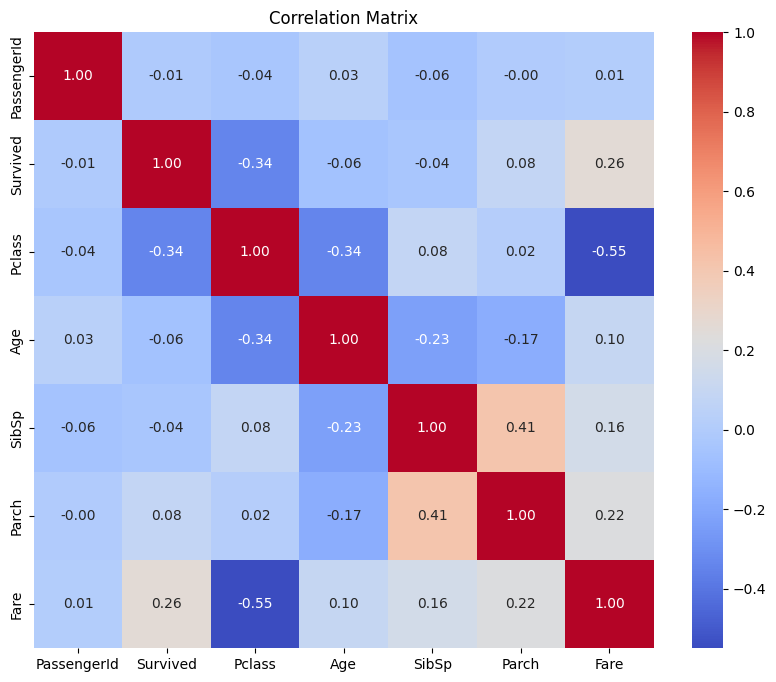

In [9]:
# Select only numeric columns for correlation
numeric_columns = train_data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Feature Engineering
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Display the first few rows to confirm the new features
print("Training Data with New Features:")
print(train_data[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())


Training Data with New Features:
   SibSp  Parch  FamilySize  IsAlone
0      1      0           2        0
1      1      0           2        0
2      0      0           1        1
3      1      0           2        0
4      0      0           1        1


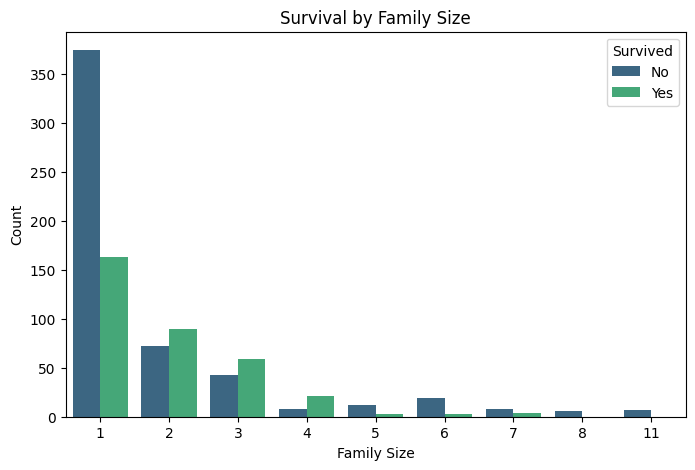

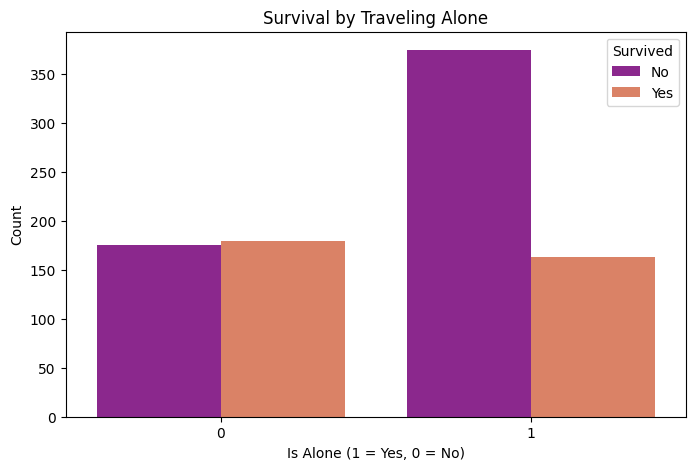

In [11]:
# Survival by FamilySize
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='FamilySize', hue='Survived', palette='viridis')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival by IsAlone
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='IsAlone', hue='Survived', palette='plasma')
plt.title('Survival by Traveling Alone')
plt.xlabel('Is Alone (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


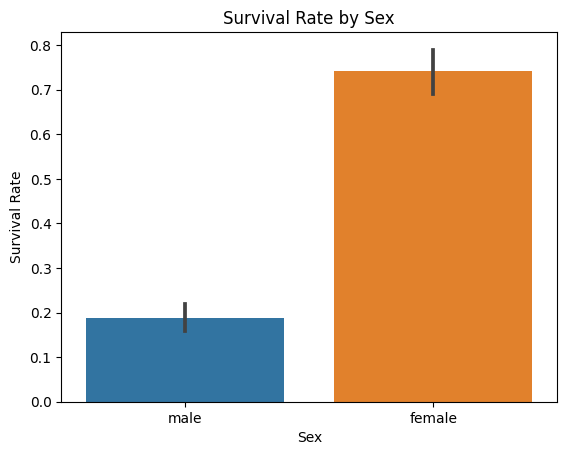

In [12]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()


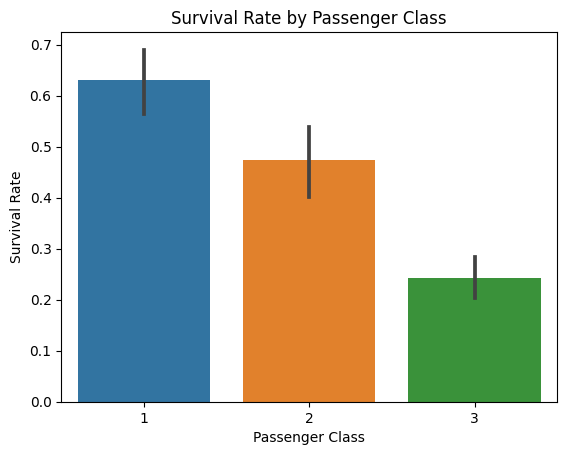

In [13]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


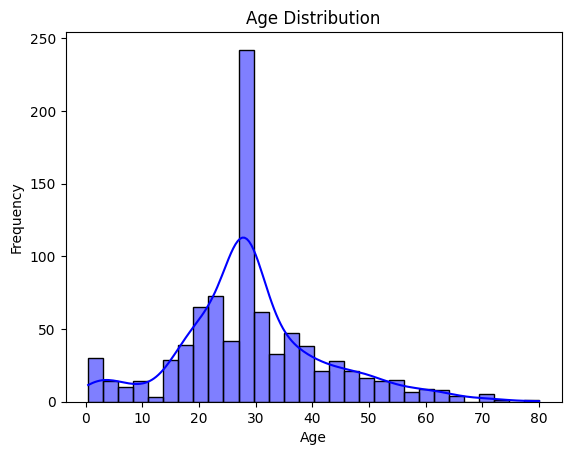

In [14]:
# Distribution of Age
sns.histplot(train_data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


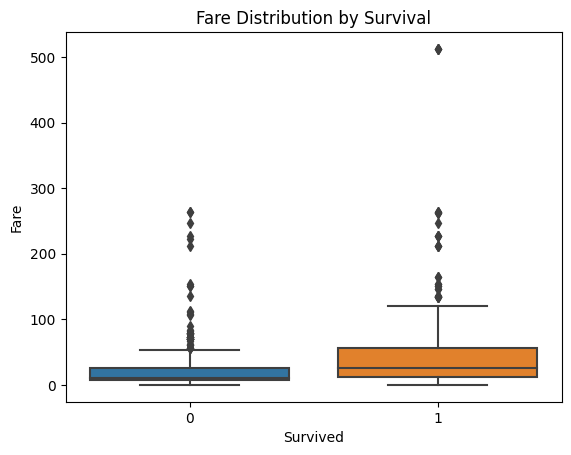

In [15]:
# Fare distribution by Survival
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


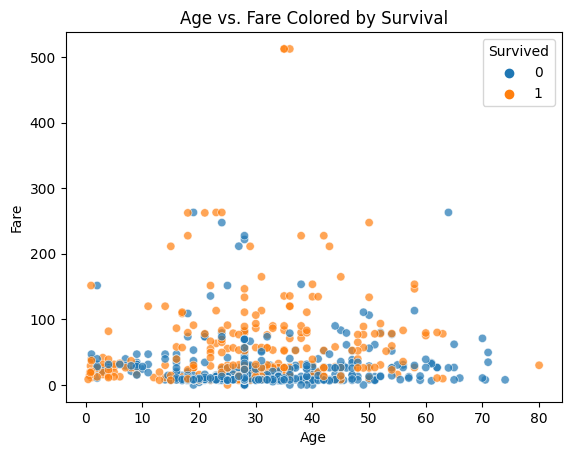

In [16]:
# Scatterplot: Age vs. Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, alpha=0.7)
plt.title('Age vs. Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()


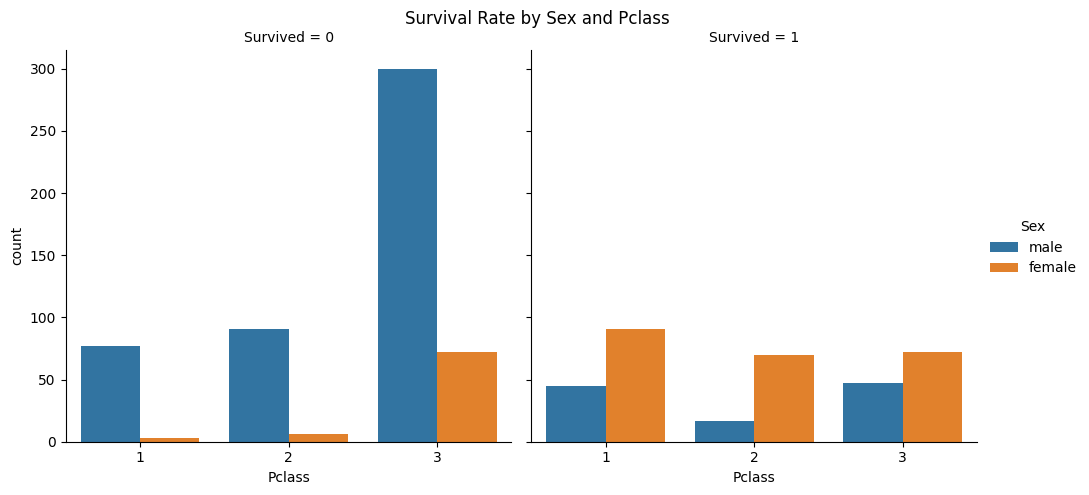

In [17]:
# Survival rate by Sex and Pclass
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=train_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival Rate by Sex and Pclass')
plt.show()


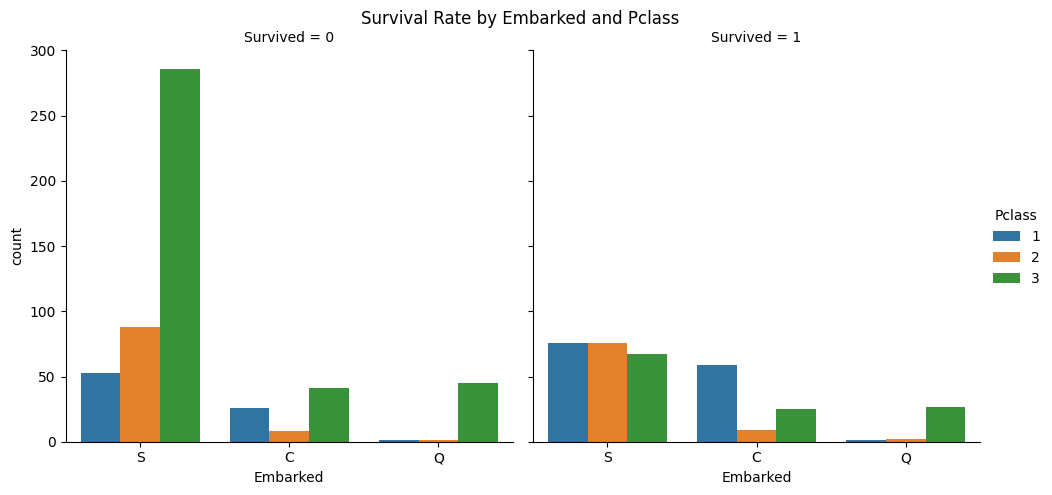

In [18]:
# Survival rate by Embarked and Pclass
sns.catplot(x='Embarked', hue='Pclass', col='Survived', kind='count', data=train_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival Rate by Embarked and Pclass')
plt.show()


In [19]:
# Feature: Family Size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Feature: IsAlone
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Extract Title from Name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display the first few rows with new features
print(train_data[['FamilySize', 'IsAlone', 'Title']].head())


   FamilySize  IsAlone Title
0           2        0    Mr
1           2        0   Mrs
2           1        1  Miss
3           2        0   Mrs
4           1        1    Mr


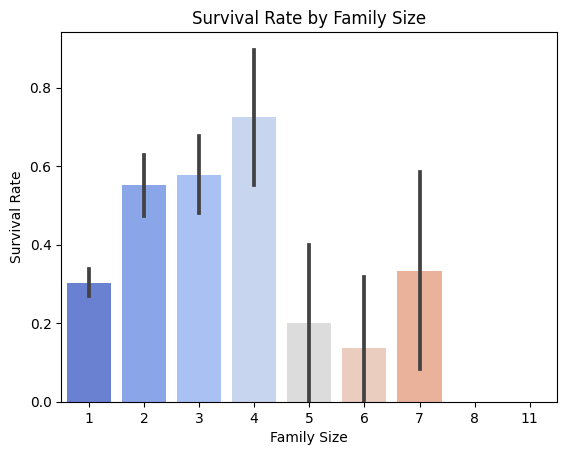

In [20]:
# Survival rate by Family Size
sns.barplot(x='FamilySize', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


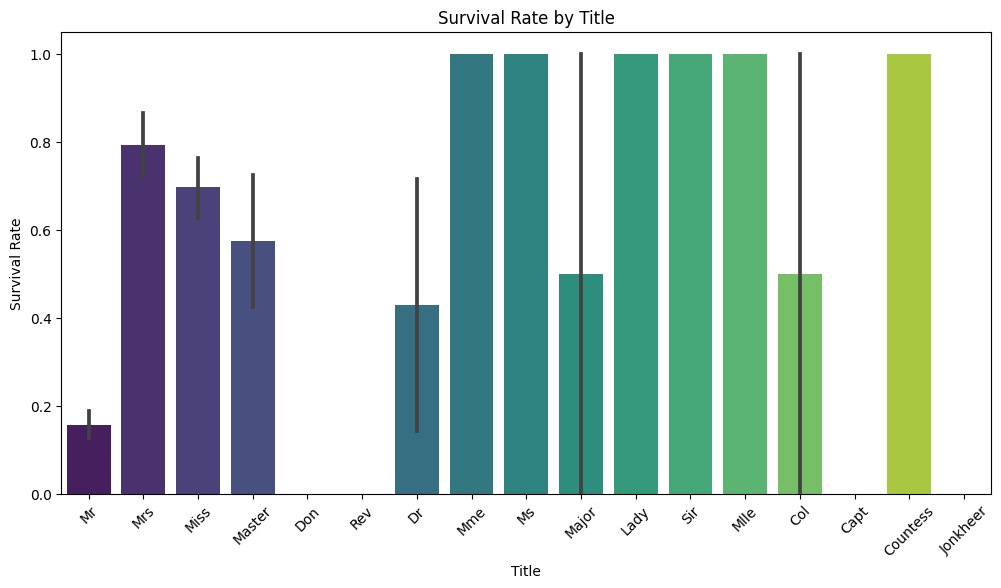

In [21]:
# Survival rate by Title
plt.figure(figsize=(12, 6))
sns.barplot(x=train_data['Title'], y=train_data['Survived'], palette='viridis')
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical columns have consistent data types (strings)
for column in ['Sex', 'Embarked', 'Title']:
    train_data[column] = train_data[column].astype(str)
    test_data[column] = test_data[column].astype(str)

# Combine unique labels from training and test datasets
for column in ['Sex', 'Embarked', 'Title']:
    all_labels = pd.concat([train_data[column], test_data[column]]).astype(str).unique()
    label_encoder = LabelEncoder()
    label_encoder.fit(all_labels)
    train_data[column] = label_encoder.transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Features and target selection
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X = train_data[features]
y = train_data['Survived']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation successful!")


Data preparation successful!


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Predict on validation data
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[91 14]
 [20 54]]


Random Forest Accuracy: 0.8435754189944135

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
 [[92 13]
 [15 59]]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


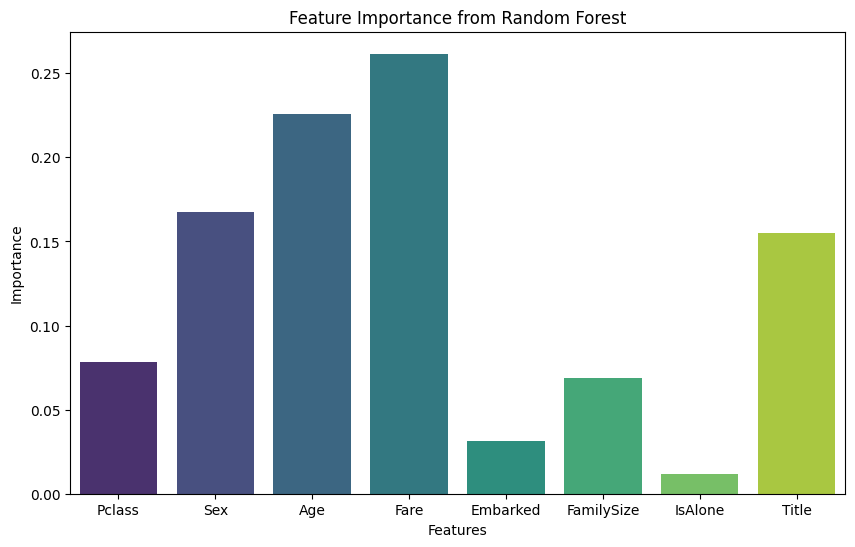

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation data
y_rf_pred = rf_model.predict(X_val)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_val, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_val, y_rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_rf_pred))

# Feature Importance
importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=importances, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [29]:
# Make predictions on the test dataset
test_predictions = rf_model.predict(test_data[features])

# Prepare the submission file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions
})

# Save to CSV
submission.to_csv('titanic_submission.csv', index=False)
print("Submission file created!")


Submission file created!


In [30]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Validate the tuned model
y_pred_tuned_rf = best_rf_model.predict(X_val)
print("Tuned Random Forest Model Accuracy on Validation Set:", accuracy_score(y_val, y_pred_tuned_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Model Accuracy on Validation Set: 0.8268156424581006


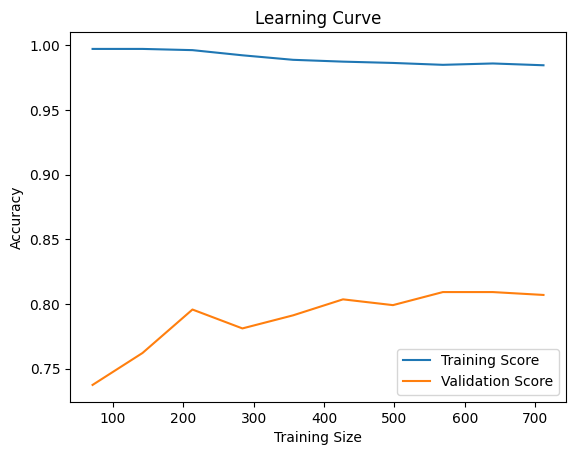

In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variables
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [36]:
import pandas as pd

# Load the CSV file
submission = pd.read_csv('titanic_submission.csv')

# Display the first few rows
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
